In [2]:
from KRZmetric import *
import numpy as np
from scipy.optimize import fsolve

In [102]:
e=0.5
p=6
iota=np.pi/6
spin=0.5

In [103]:
def Vr(E,L,e,p,iota,spin):
    #Vr at apestron and periastron, assuming Vth(theta_min)=0, i.e.Q=cos(theta)*(a**2*(1-E**2)+L**2/(sin(theta)*sin(theta)));
    a=spin
    ra=p/(1-e);
    rp=p/(1+e);
    theta=np.pi/2-iota;

    Del=ra**2-2*ra+a**2;
    P=E*(ra**2+a**2)-a*L;
    Q=np.cos(theta)**2*(a**2*(1-E**2)+L**2/(np.sin(theta)*np.sin(theta)));
    vra=P**2-Del*(ra**2+(L-a*E)**2+Q);

    Delp=rp**2-2*rp+a**2;
    Pp=E*(rp**2+a**2)-a*L;
    vrp=Pp**2-Delp*(rp**2+(L-a*E)**2+Q);
    return vra,vrp

In [104]:
def myfunc(x):
    E=x[0]
    L=x[1]
    V= Vr(E,L,e,p,iota,spin)
    print('E:%f, L:%f, V: %f, %f'%(E,L,V[0],V[1]))
    return V

In [105]:
myE,myL=fsolve(myfunc,[0.9,3.0])

E:0.900000, L:3.000000, V: -1992.797969, -38.227969
E:0.900000, L:3.000000, V: -1992.797969, -38.227969
E:0.900000, L:3.000000, V: -1992.797969, -38.227969
E:0.900000, L:3.000000, V: -1992.797468, -38.227963
E:0.900000, L:3.000000, V: -1992.798013, -38.227972
E:0.947092, L:2.761422, V: 37.252038, 0.060152
E:0.945951, L:2.755107, V: -1.824725, -0.059125
E:0.945982, L:2.754497, V: -0.058439, -0.003678
E:0.945982, L:2.754446, V: -0.002472, -0.000158
E:0.945982, L:2.754444, V: -0.000002, -0.000000
E:0.945982, L:2.754444, V: -0.000000, -0.000000


In [106]:
E=myE
L=myL

In [107]:
Vr(myE,myL,e,p,iota,spin)

(-7.2759576141834259e-12, -7.673861546209082e-13)

In [108]:
a=spin
ra=p/(1-e);
rp=p/(1+e);
theta=np.pi/2-iota;
Q=np.cos(theta)**2*(a**2*(1-E**2)+L**2/(np.sin(theta)*np.sin(theta)))

In [109]:
E,L,Q

(0.94598236630224186, 2.754443512189142, 2.5355561891122758)

In [35]:
8.25/1.1

7.499999999999999

In [36]:
#画图

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [111]:
M=2e5
d1=0;d2=0;d3=0
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,L,Q,d1,d2,d3),unpack=True)

In [112]:
x=[];
y=[];
z=[];

for i in np.arange(index.size):
    x.append(np.sqrt(r[i]*r[i]+spin*spin)*np.sin(th[i])*np.cos(phi[i]));
    y.append(np.sqrt(r[i]*r[i]+spin*spin)*np.sin(th[i])*np.sin(phi[i]));
    z.append(np.sqrt(r[i]*r[i]+spin*spin)*np.cos(th[i]));

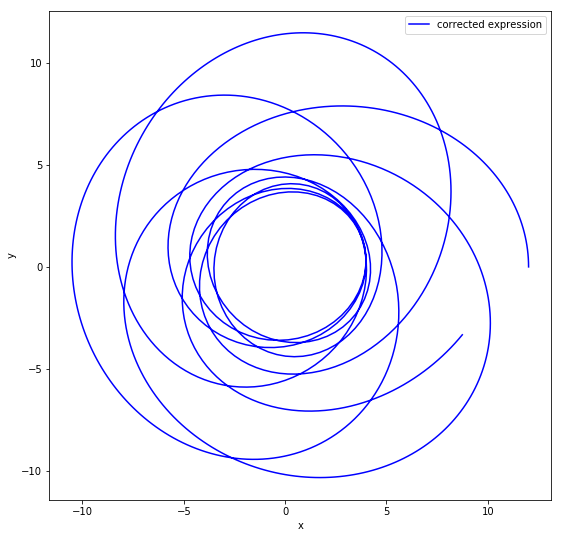

In [114]:
fig = plt.figure()
time=1000
fig.set_size_inches(9, 9)
#plt.xlim(-20,20)
#plt.ylim(-20,20)
geo1=plt.plot(x[0:time],y[0:time],'b',label='corrected expression')
#geo2=plt.plot(x2,y2,'y--',label='numerical derivative')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

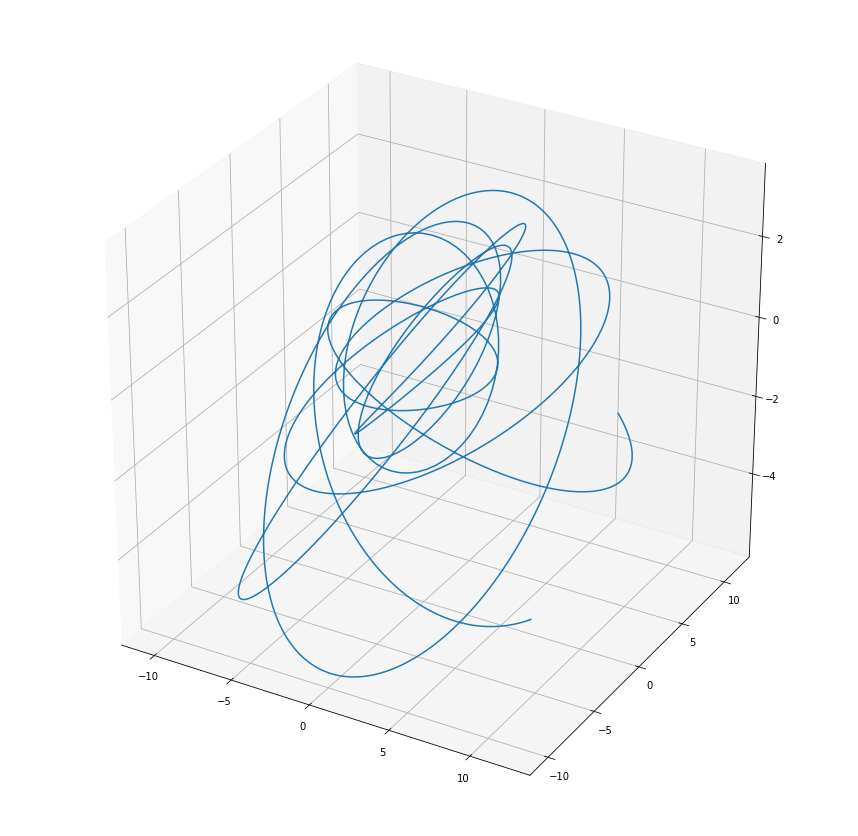

In [115]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.gca(projection='3d')

time=1000
#myx=[]
#myy=[]
#myz=[]
#ax.axis([-10,10,-10,10])
#ax.set_xticks(np.linspace(-10,10,10))
#ax.set_yticks(np.linspace(-10,10,10))
#ax.set_zticks(np.linspace(-10,10,10))
#for i in np.arange(index.size):
    #myx.append(x[i])
    #myy.append(y[i])
    #myz.append(z[i])
ax.plot(x[0:time],y[0:time],z[0:time])
#ax.plot(x2,y2,z2,'y--')

(0, 2000)

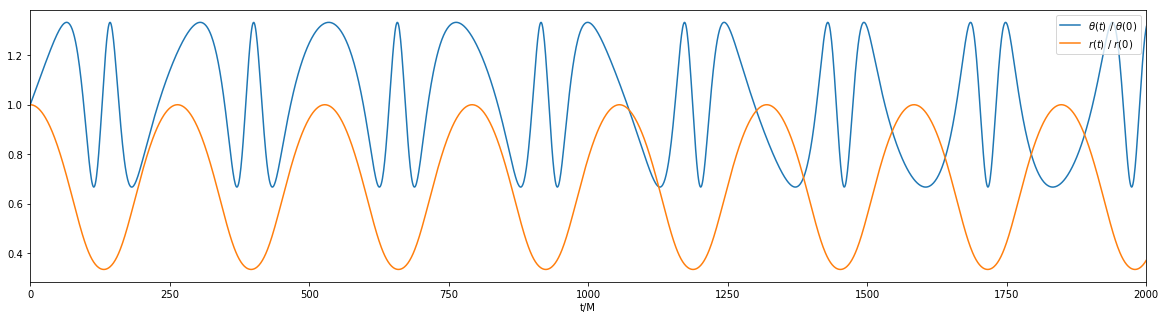

In [136]:
plt.figure(figsize=[20,5])

plt.plot(t,th/th[0],label='$\\theta(t)\,\,/ \,\,\\theta(0) $')
plt.plot(t,r/r[0],label='$r(t)\,\,/\,\,r(0)$')
#plt.plot(t,/r[0],label='$r(t)\,\,/\,\,r(0)$')
plt.legend()
plt.xlabel('t/M')
plt.xlim(0,2000)

In [117]:
np.min(th)

1.0471989375999999

In [118]:
np.pi/2-iota

1.0471975511965979

In [119]:
ra=np.max(r)
ra

12.005801314999999

In [120]:
rp=np.min(r)
rp

3.9999308354999998

In [121]:
p/(1-e)

12.0

In [122]:
p/(1+e)

4.0

In [123]:
np.sqrt(Q)/L

0.57809970697341206

In [124]:
np.tan(iota)

0.57735026918962573